# AIN 214 - PA2 - FALL 2023

BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE AN UNDERSTANDABLE AND TRACBLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED YO COMMENT ON YOUR RESULTS OR EPXLAIN YOUR REASONING. ALSO, PLEASE DO NO HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT REPORTING IS A KEY STEP IN DATA SCIENCE.

Deadline: 17.11.2023 (23:59:59)

Submission: Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

# THE STUDENT INFO
# Student Name: Emirhan Utku
# Student ID: 2210765029

In [1]:
# imports
import sqlite3
import csv
import pandas as pd

# 1st SET OF QUESTIONS: Skyward Travel Agency Data Management Project

Skyward is a premier travel agency aiming to provide seamless experiences for its clients. As business is booming, the agency has a myriad of data points to keep track of, and they need an efficient way to manage it all. Here's what they're dealing with:

- **Clients' Database**: Skyward has a growing list of clients. For each client, they maintain records of their full name, contact email, and phone number. Every client is assigned a unique client ID for efficient tracking and personalized service.

- **Airline Partnerships**: Skyward has collaborations with several airline companies, each identified by a unique airline ID. Beyond just names, they have comprehensive details of all the flights offered by these airline companies. This flight data includes flight numbers, associated airline IDs, departure cities, destinations, and dates of operation.

- **Hotel Affiliations**: Skyward's clients need places to stay, leading to collaborations with multiple hotels. Each hotel is cataloged with a unique ID, alongside its name, geographical location, and a client feedback rating ranging from 1 to 5.

- **Travel Bookings**: Skyward's primary service involves facilitating travel bookings. Every booking, be it for a flight or hotel, gets recorded. Flight bookings include the specific flight number, the client's ID making the booking, and the booking date. Hotel bookings aren't any different with records of the hotel ID, the client's ID, and the duration of stay (check-in and check-out dates).

- **Feedback Mechanism**: Feedback drives Skyward's quality assurance. Clients are encouraged to leave reviews post their trips. For airlines, each review captures the client's ID, the reviewed airline's ID, and the feedback text. Hotel feedback mirrors this, substituting airlines for hotels.

**Data Provision:**
You are provided with unnormalized `feedback_details_df` and `bookings_df` datasets in the form of CSV files.

**Your Task**:

You should design your own DB schema meeting the above-stated constraints. There are multiple ways to design your tables; you only need to ensure that the design fits the outlined requirements. Begin by clearly defining your schema as tables. Once the schema is established, you will tackle a set of SQL tasks that will be provided separately. The SQL tasks will involve writing queries to extract, modify, or add data based on the designed schema. Good luck! 

**Note: Use sqite3 python package for DB**


## Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>

Example Table:

| Field         | Type/Constraints                           |
|---------------|--------------------------------------------|
| table1_id     | PK, int                          |
| table2_id     | FK REFERENCING tabl2, int                          |
| ...     | ...                         |




Table 1: Clients


| Column        | Type    | Key          | Description        |
|---------------|---------|--------------|--------------------|
| CustomerID    | TEXT    | PRIMARY KEY  | Customers ID       |
| CustomerName  | TEXT    |              | Customers Name     |
| CustomerEmail | TEXT    |              | Customers Email    |
| CustomerPhone | TEXT    |              | Customers Phone    |


Table 2: AirlinesAndFlightDataBase
    
    
| Column            | Type    | Key           | 
|-------------------|---------|---------------|
| FlightID          | TEXT    | PRIMARY KEY   | 
| AirlineName       | TEXT    |               | 
| AirlineID         | INTEGER |               | 
| Flight_Departure  | TEXT    |               | 
| Flight_Destination | TEXT    |               | 
| Flight_Date       | TEXT    |               | 

Table 3: HotelDatabase


| Column         | Type    | Key           |
|----------------|---------|---------------|
| HotelID        | TEXT    |               | 
| HotelName      | TEXT    |               | 
| HotelLocation  | TEXT    |               |
| HotelRating    | INTEGER |               | 


Table 4: HotelBookings


| Column     | Type    | Key           |
|------------|---------|---------------|
| BookingID  | INTEGER | PRIMARY KEY   |
| HotelID    | TEXT    | FOREIGN KEY   |
| CustomerID | TEXT    | FOREIGN KEY   |


Table 5: FlightBookings

| Column      | Type    | Key           | 
|-------------|---------|---------------|
| BookingID   | INTEGER | PRIMARY KEY,FOREIGN KEY    |
| FlightID    | TEXT    | PRIMARY KEY,FOREIGN KEY    |               
| CustomerID  | TEXT    |         FOREIGN KEY       |             
| FlightDate  | TEXT    |      FOREIGN KEY          |     


Table 6: FeedbackDatabase
    
| Column       | Type    | Key           | Description         |
|--------------|---------|---------------|---------------------|
| FeedbackID   | TEXT    | PRIMARY KEY   | Feedback ID         |
| CustomerID   | TEXT    |       FOREIGN KEY        | Customer ID         |
| AirlineID    | TEXT    |     FOREIGN KEY          | Airline ID          |
| HotelID      | TEXT    |     FOREIGN KEY          | Hotel ID            |
| Review       | TEXT    |               | Feedback Review     |


In [24]:
conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS Client')



cursor.execute('''
    CREATE TABLE IF NOT EXISTS Client (
        CustomerID TEXT PRIMARY KEY,
        CustomerName TEXT,
        CustomerEmail TEXT,
        CustomerPhone TEXT 
    )
''')


with open('BookingDetails.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader) 

    
    for row in csvreader:
        customer_id, customer_name, customer_email, customer_phone = row[1], row[2], row[3], row[4]

        
        cursor.execute('''
            INSERT OR IGNORE INTO Client (CustomerID, CustomerName, CustomerEmail, CustomerPhone)
            VALUES (?, ?, ?, ?)
        ''', (customer_id, customer_name, customer_email, customer_phone))



df = pd.read_sql_query("SELECT * FROM Client", conn)
display(df)


conn.commit()
conn.close()


,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,6145,Ethan Smith,ethan.smith@mail.com,555-0665405
1,6148,Ethan Martinez,ethan.martinez@mail.com,555-3339628
2,4106,Ethan Rodriguez,ethan.rodriguez@mail.com,555-3077795
3,6156,Mia Rodriguez,mia.rodriguez@mail.com,555-6360055
4,4110,Ethan Martinez,ethan.martinez@mail.com,555-5293267
...,...,...,...,...
495,2016,Ethan Davis,ethan.davis@mail.com,555-4347686
496,4065,Mia Williams,mia.williams@mail.com,555-3213981
497,6117,Logan Martinez,logan.martinez@mail.com,555-6781352
498,6134,Ethan Rodriguez,ethan.rodriguez@mail.com,555-7428799


In [26]:



conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS AirlinesAndFlightDataBase')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS AirlinesAndFlightDataBase (
        FlightID TEXT PRİMARY KEY ,
        AirlineName TEXT ,
        AirlineID INTEGER,
        Flight_Departure TEXT,
        Flight_Destination TEXT,
        Flight_Date TEXT
    )
''')



with open('BookingDetails.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  

    
    
    for row in csvreader:
        if row[15] and row[10] and row[5] and row[6] and row[7] and row[8]:
            
            
            flight_id, airline_name = row[5], row[10]
            airline_id, departure, destination, flight_date = row[15], row[6], row[7], row[8]


            cursor.execute('''
                INSERT INTO AirlinesAndFlightDataBase (FlightID, AirlineName,AirlineID, Flight_Departure, Flight_Destination, Flight_Date)
                VALUES (?, ?,?,?,?,?)
            ''', (flight_id, airline_name,airline_id, departure, destination, flight_date))



            
            


df_airlines_flights = pd.read_sql_query("SELECT * FROM AirlinesAndFlightDataBase", conn)
display(df_airlines_flights)

conn.commit()
conn.close()



,FlightID,AirlineName,AirlineID,Flight_Departure,Flight_Destination,Flight_Date
0,8513,AirZoom,8533,Hong Kong,Barcelona,2024-10-07 16:33:28.557244
1,4951,AirZoom,8533,Barcelona,Paris,2024-05-31 16:33:28.557253
2,8673,AirWave,8863,Istanbul,Dubai,2024-07-19 16:33:28.557320
3,2794,JetStream,2218,Kuala Lumpur,London,2023-12-29 16:33:28.557202
4,8338,SkyPace,6418,Istanbul,Barcelona,2024-03-03 16:33:28.557169
...,...,...,...,...,...,...
503,7498,SkyLink,2974,Singapore,Tokyo,2024-04-30 16:33:28.557246
504,8290,AirNest,9097,Hong Kong,Dubai,2024-03-05 16:33:28.557151
505,8290,AirNest,9097,Hong Kong,Dubai,2024-03-05 16:33:28.557151
506,7243,SkyWings,5415,Hong Kong,London,2024-08-17 16:33:28.557143


In [40]:



conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS HotelDatabase')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS HotelDatabase (
        HotelID TEXT  ,
        HotelName TEXT ,
        HotelLocation TEXT,
        HotelRating INTEGER
    
    )
''')



with open('BookingDetails.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  

    
    
    for row in csvreader:
        if row[11] and row[12] and row[13] and row[14]:
            
            
            
            hotel_id, hotel_name, hotel_location, hotel_rating = row[11], row[12], row[13], row[14]


            cursor.execute('''
                INSERT INTO HotelDatabase (HotelID, HotelName,HotelLocation, HotelRating)
                VALUES (?, ?,?,?)
            ''', (hotel_id, hotel_name,hotel_location, hotel_rating))



            
            


df_airlines_flights = pd.read_sql_query("SELECT * FROM HotelDatabase", conn)
display(df_airlines_flights)

conn.commit()
conn.close()



,HotelID,HotelName,HotelLocation,HotelRating
0,1647,Silver Villa,Location_42,5
1,6921,Ruby Plaza,Location_4,5
2,1919,Emerald Motel,Location_50,4
3,7428,Crystal Motel,Location_3,4
4,5095,Sapphire Hideaway,Location_39,5
...,...,...,...,...
483,4857,Diamond Inn,Location_47,2
484,7428,Crystal Motel,Location_3,4
485,8577,Emerald Palace,Location_1,4
486,5769,Golden Resort,Location_5,1


In [44]:



conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS HotelBookings')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS HotelBookings (
        BookingID INTEGER PRİMARY KEY,
        HotelID TEXT ,
        CustomerID TEXT ,
        FOREIGN KEY (HotelID) REFERENCES HotelDatabase(HotelID)
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID)
        
        
    )
''')



with open('BookingDetails.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  

    
    
    for row in csvreader:
        if row[11]:
            
            
            booking_id,hotel_id,customer_id=row[0],row[11],row[2]


            cursor.execute('''
                INSERT INTO HotelBookings (BookingID,HotelID,CustomerID)
                VALUES (?, ?,?)
            ''', (booking_id, hotel_id,customer_id))



            
            


df_hotel_bookings = pd.read_sql_query("SELECT * FROM HotelBookings", conn)
display(df_hotel_bookings)

conn.commit()
conn.close()



,BookingID,HotelID,CustomerID
0,2,1647,Ethan Smith
1,4,6921,Ethan Martinez
2,5,1919,Ethan Martinez
3,6,7428,Ethan Martinez
4,8,5095,Ethan Rodriguez
...,...,...,...
483,988,4857,Mia Williams
484,989,7428,Logan Martinez
485,991,8577,Logan Martinez
486,992,5769,Ethan Rodriguez


In [46]:



conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS FlightBookings')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS FlightBookings (
        BookingID INTEGER PRİMARY KEY,
        FlightID TEXT PRİMARY KEY ,
        CustomerID TEXT ,
        FlightDate Text,
        FOREIGN KEY (FlightId) REFERENCES AirlinesAndFlightDataBase(FlightID)
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID)
        FOREIGN KEY (FlightDate) REFERENCES AirlinesAndFlightDataBase(FlightDate)
        FOREIGN KEY (BookingID) REFERENCES HotelDatabase(BookingID)
        
        
        
        
    )
''')



with open('BookingDetails.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  

    
    
    for row in csvreader:
        if row[5]:
            
            
            booking_id,flight_id,customer_id,flight_date=row[0],row[5],row[2],row[8]


            cursor.execute('''
                INSERT INTO FlightBookings (BookingID,FlightID,CustomerID,FlightDate)
                VALUES (?, ?,?,?)
            ''', (booking_id, flight_id,customer_id,flight_date))



            
            


df_flight_bookings = pd.read_sql_query("SELECT * FROM FlightBookings", conn)
display(df_flight_bookings)

conn.commit()
conn.close()



,BookingID,FlightID,CustomerID,FlightDate
0,1,8513,Ethan Smith,2024-10-07 16:33:28.557244
1,3,4951,Ethan Smith,2024-05-31 16:33:28.557253
2,7,8673,Ethan Rodriguez,2024-07-19 16:33:28.557320
3,9,2794,Ethan Rodriguez,2023-12-29 16:33:28.557202
4,15,8338,Mason Miller,2024-03-03 16:33:28.557169
...,...,...,...,...
503,985,7498,Ethan Davis,2024-04-30 16:33:28.557246
504,990,8290,Logan Martinez,2024-03-05 16:33:28.557151
505,993,8290,Ethan Rodriguez,2024-03-05 16:33:28.557151
506,994,7243,Ethan Rodriguez,2024-08-17 16:33:28.557143


In [47]:



conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS FeedbackDatabase')


cursor.execute('''
    CREATE TABLE IF NOT EXISTS FeedbackDatabase (
        FeedbackID TEXT PRİMARY KEY  ,
        CustomerID TEXT ,
        AirlineID TEXT,
        HotelID TEXT,
        Review TEXT,
        FOREIGN KEY (CustomerID) REFERENCES Clients(CustomerID),
        FOREIGN KEY (AirlineID) REFERENCES AirlinesAndFlightDataBase(AirlineID),
        FOREIGN KEY (HotelID) REFERENCES HotelDatabase(HotelID)
        
            
    )
''')



with open('FeedbackDetails.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  

    
    
    for row in csvreader:
        if  row[2] :
            
            
            
            feedback_id, customer_id, airline_id,review = row[0], row[1], row[2],row[4]


            cursor.execute('''
                INSERT INTO FeedbackDatabase (FeedbackID,CustomerID, AirlineID,Review)
                VALUES (?, ?,?,?)
            ''', (feedback_id,customer_id,airline_id,review))
        elif row[3]:
        
            
            feedback_id, customer_id, hotel_id,review = row[0], row[1], row[3],row[4]

            cursor.execute('''
                INSERT INTO FeedbackDatabase (FeedbackID,CustomerID, HotelID,Review)
                VALUES (?, ?,?,?)
            ''', (feedback_id,customer_id,hotel_id,review))
            
        



            
            

df_feedback = pd.read_sql_query("SELECT * FROM FeedbackDatabase", conn)
display(df_feedback)

conn.commit()
conn.close()



,FeedbackID,CustomerID,AirlineID,HotelID,Review
0,3073,7498,6418.0,None,Horrible experience with the seat.
1,6658,6744,6418.0,None,The cabin cleanliness was impressive.
2,6149,8207,3233.0,None,Decent experience with the cabin cleanliness.
3,8198,9382,6418.0,None,I found the in-flight entertainment to be aver...
4,8710,3067,2218.0,None,The crew was average.
...,...,...,...,...,...
595,8182,4009,None,4147.0,Impressive experience with the room.
596,2041,7934,None,4656.0,Fantastic experience with the service.
597,6650,2310,None,2525.0,The pool was excellent.
598,7164,7798,None,5994.0,The service was average.


## Q2. Find the total number of bookings made for each hotel. Display the hotel name and the corresponding number of bookings. (10 Points)

In [17]:
# your code here
conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()


query = '''
    SELECT HotelName,HotelID, COUNT(HotelID) as NumberOfBookings
    FROM HotelDatabase
    GROUP BY HotelID
'''

df_bookings_per_hotel = pd.read_sql_query(query, conn)
display(df_bookings_per_hotel)

conn.commit()
conn.close()


,HotelName,HotelID,NumberOfBookings
0,Opal Motel,1464,11
1,Diamond Plaza,1513,6
2,Golden Suites,1610,16
3,Silver Villa,1647,10
4,Emerald Motel,1919,15
5,Sapphire Villa,2035,14
6,Jade Motel,2049,5
7,Jade Suites,2206,7
8,Pearl Resort,2504,12
9,Emerald Resort,2525,9


## Q3. Retrieve the name and contact details of clients who have provided feedback for both flights and hotels. Ensure there are no duplicate entries in your result. (10 Points)


In [34]:
conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS ClientsWithFeedbackForBoth AS
    SELECT DISTINCT f1.CustomerID
    FROM FeedbackDatabase f1, FeedbackDatabase f2
    WHERE f1.CustomerID = f2.CustomerID
      AND f1.AirlineID IS NOT NULL
      AND f2.HotelID IS NOT NULL
''')

cursor.execute('''
    SELECT c.CustomerID, c.CustomerName, c.CustomerEmail, c.CustomerPhone
    FROM Client c
    JOIN ClientsWithFeedbackForBoth cf ON c.CustomerID = cf.CustomerID
    GROUP BY c.CustomerID, c.CustomerName, c.CustomerEmail, c.CustomerPhone
    HAVING COUNT(DISTINCT cf.CustomerID) > 0
''')

results = cursor.fetchall()
results_df2 = pd.DataFrame(results, columns=['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone'])
display(results_df2)


conn.commit()
conn.close()


,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,1045,Mason Jones,mason.jones@mail.com,555-0497376
1,1085,Olivia Miller,olivia.miller@mail.com,555-8743718
2,1094,Mason Martinez,mason.martinez@mail.com,555-4087377
3,1229,Emma Miller,emma.miller@mail.com,555-9672748
4,1241,Olivia Garcia,olivia.garcia@mail.com,555-0514945
...,...,...,...,...
104,9527,Ethan Davis,ethan.davis@mail.com,555-0282897
105,9642,John Smith,john.smith@mail.com,555-4394283
106,9698,Mia Williams,mia.williams@mail.com,555-6569856
107,9764,Logan Williams,logan.williams@mail.com,555-2061905


## Q4. Identify hotels that have a feedback rating lower than the average feedback rating across all hotels. List their names and ratings. (10 Points)


In [51]:
# your code here


conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()

cursor.execute('''
    SELECT HotelName, AVG(HotelRating) AS AverageRating
    FROM HotelDatabase
    GROUP BY HotelID
    HAVING AVG(HotelRating) < (SELECT AVG(HotelRating) FROM HotelDatabase)
''')
results = cursor.fetchall()
results_df=pd.DataFrame(results,columns=['HotelName','HotelRating'])
display(results_df)





conn.commit()
conn.close()









,HotelName,HotelRating
0,Opal Motel,2.0
1,Diamond Plaza,2.0
2,Sapphire Villa,2.0
3,Jade Motel,2.0
4,Pearl Resort,2.0
5,Emerald Resort,3.0
6,Golden Inn,3.0
7,Jade Resort,2.0
8,Silver Palace,2.0
9,Pearl Hideaway,1.0


## Q5. Find clients who have stayed in at least three different hotels and flown with at least two different airlines. Display their names and total number of bookings. (10 Points)


In [9]:
# your code here



conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()

cursor.execute('DROP TABLE IF EXISTS TotalBooking')
cursor.execute('''
    CREATE TABLE IF NOT EXISTS TotalBooking (
        CustomerID INTEGER  ,
        CustomerName TEXT,
        HotelID INTEGER ,
        AirlineID INTEGER
    
    )
''')



with open('BookingDetails.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  

    
    
    for row in csvreader:
        if row[11]:
            
    
        
            customer_id,customer_name,hotel_id =row[1],row[2],  row[11]


            cursor.execute('''
                INSERT INTO TotalBooking (CustomerID,CustomerName, HotelID)
                VALUES (?, ?,?)
            ''', (customer_id,customer_name, hotel_id))
        elif row[15]:
            
            customer_id,customer_name,airline_id =row[1],row[2], row[15]


            cursor.execute('''
                INSERT INTO TotalBooking (CustomerID,CustomerName,AirlineID)
                VALUES (?, ?,?)
            ''', (customer_id,customer_name,airline_id))




query = '''
    SELECT CustomerID, COUNT(DISTINCT CASE WHEN HotelID <> 'NaN' THEN HotelID END) as NumHotels, COUNT(DISTINCT CASE WHEN AirlineID <> 'NaN' THEN AirlineID END) as NumAirlines,
    COUNT(DISTINCT CASE WHEN HotelID <> 'NaN' THEN HotelID END) + COUNT(DISTINCT AirlineID) as TotalNum
    FROM TotalBooking
    GROUP BY CustomerID
    HAVING NumHotels >= 3 AND NumAirlines >= 2
    
    
'''

result = pd.read_sql_query(query, conn)
display(result)

conn.commit()
conn.close()








,CustomerID,NumHotels,NumAirlines,TotalNum


## Q6 - **Bonus/Challenge**: Do the same in Q3 without using the keywords: "HAVING" and "GROUP BY". Make a comparison on the two processes (one using the aggregate operators and this) 

In [33]:
conn = sqlite3.connect('skyward_database.db')
cursor = conn.cursor()


cursor.execute('''
    CREATE TABLE IF NOT EXISTS ClientsWithFeedbackForBoth AS
    SELECT DISTINCT f1.CustomerID
    FROM FeedbackDatabase f1, FeedbackDatabase f2
    WHERE f1.CustomerID = f2.CustomerID
      AND f1.AirlineID IS NOT NULL
      AND f2.HotelID IS NOT NULL
''')


cursor.execute('''
    SELECT c.CustomerID, c.CustomerName, c.CustomerEmail, c.CustomerPhone
    FROM Client c
    WHERE c.CustomerID IN (
        SELECT CustomerID
        FROM ClientsWithFeedbackForBoth
    )
''')


results = cursor.fetchall()
results_df2 = pd.DataFrame(results, columns=['CustomerID', 'CustomerName', 'CustomerEmail', 'CustomerPhone'])
display(results_df2)


conn.commit()
conn.close()


,CustomerID,CustomerName,CustomerEmail,CustomerPhone
0,1045,Mason Jones,mason.jones@mail.com,555-0497376
1,1085,Olivia Miller,olivia.miller@mail.com,555-8743718
2,1094,Mason Martinez,mason.martinez@mail.com,555-4087377
3,1229,Emma Miller,emma.miller@mail.com,555-9672748
4,1241,Olivia Garcia,olivia.garcia@mail.com,555-0514945
...,...,...,...,...
104,9527,Ethan Davis,ethan.davis@mail.com,555-0282897
105,9642,John Smith,john.smith@mail.com,555-4394283
106,9698,Mia Williams,mia.williams@mail.com,555-6569856
107,9764,Logan Williams,logan.williams@mail.com,555-2061905


# 2nd SET OF QUESTIONS: DATA ANALYSIS WITH VISUALIZATION TOOLS

In the 2nd part of this hw, you are to deal with the famous dataset of Titanic [1]. Answer the following questions, using visualization tools, and comment on your work.

## Q1. Read the Titanic dataset into a DataFrame. Using a pivot table, analyze the survival rate by gender and class.


Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


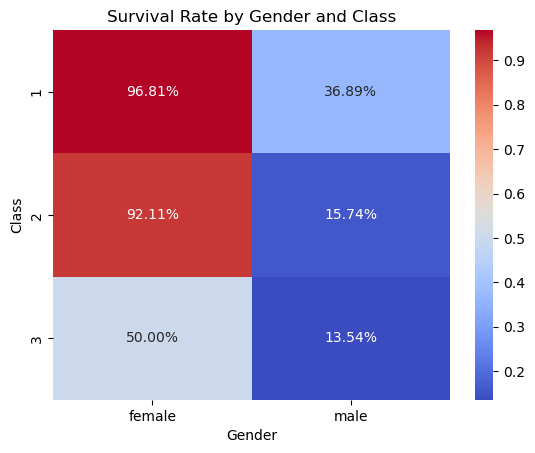

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


titanic_df = pd.read_csv('titanic.csv')


pivot_table = pd.pivot_table(titanic_df, values='Survived', index='Pclass', columns='Sex', aggfunc='mean')


display(pivot_table)


sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2%")


plt.xlabel('Gender')
plt.ylabel('Class')
plt.title('Survival Rate by Gender and Class')


plt.show()



## Q2. Create a histogram showcasing the age distribution of passengers. Overlay this with a KDE plot. Comment on the most common age group aboard the Titanic.


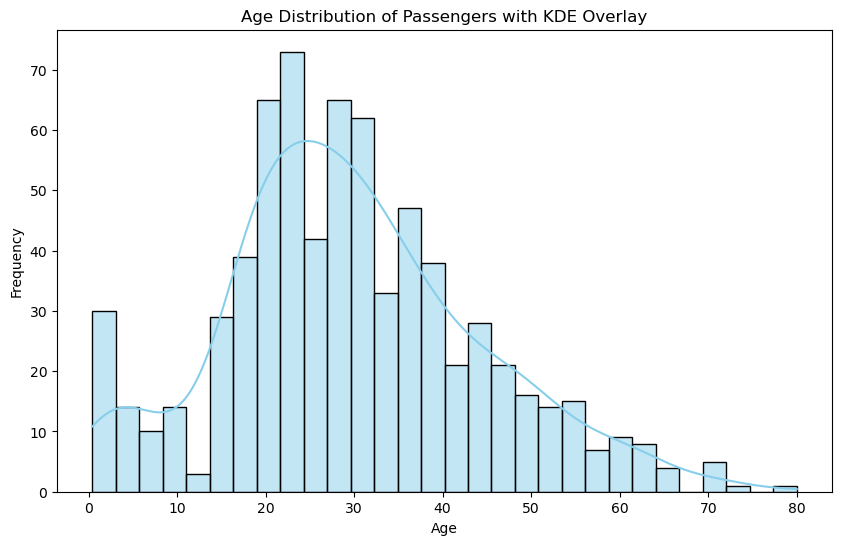

In [12]:
# your code here
import seaborn as sns
import matplotlib.pyplot as plt


titanic_df = titanic_df.dropna(subset=['Age'])


fig, ax = plt.subplots(figsize=(10, 6))


sns.histplot(titanic_df['Age'], kde=True, bins=30, color='skyblue', ax=ax)


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers with KDE Overlay')


plt.show()


## Exploring the Titanic: Unveiling the Dominant Age Group on Board

The age distribution analysis of Titanic passengers, portrayed through a vivid histogram and Kernel Density Estimate (KDE) plot, offers valuable insights. Within this visual narrative, a prominent age group emerges, centered around the 20 to 30-year range. This age bracket commands the highest frequency, indicating a substantial presence of passengers in their twenties. The KDE overlay, providing a smooth estimation of probability density, accentuates this peak and underscores the prevalence of young adults among Titanic travelers. This finding resonates with historical context, reflecting the demographic composition of passengers during the Titanic's fateful voyage. In essence, the visualization distinctly identifies the age group that predominantly characterized the Titanic's passenger manifest.

## Q3. Using a pie chart, illustrate the embarkation points for Titanic passengers. Identify the port with the highest boarding. Analyze the age and sex distribution from this port. Does this distribution reflect the "women and children first" evacuation policy?

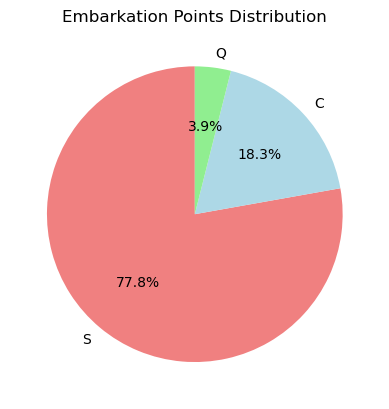

The port with the highest boarding is: S


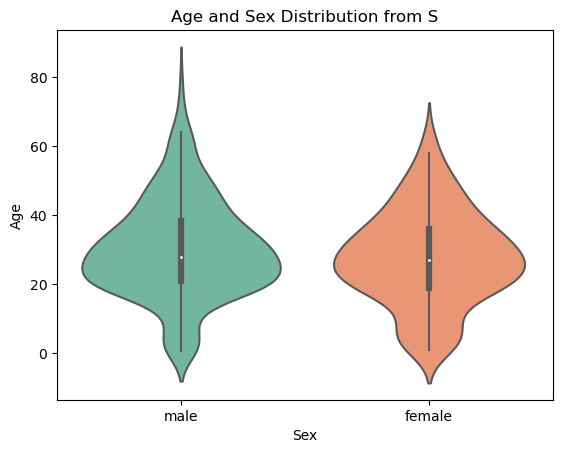

In [13]:
# your code here



embarkation_counts = titanic_df['Embarked'].value_counts()
labels = embarkation_counts.index
sizes = embarkation_counts.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])


plt.title('Embarkation Points Distribution')


plt.show()

highest_boarding_port = embarkation_counts.idxmax()
print(f'The port with the highest boarding is: {highest_boarding_port}')


selected_port_data = titanic_df[titanic_df['Embarked'] == highest_boarding_port]

sns.violinplot(x='Sex', y='Age', data=selected_port_data, palette='Set2')


plt.xlabel('Sex')
plt.ylabel('Age')
plt.title(f'Age and Sex Distribution from {highest_boarding_port}')


plt.show()



## Analyzing Titanic Passenger Demographics: Insights into the "Women and Children First" Evacuation Policy

The distribution of age and sex from the port with the highest boarding on the Titanic may provide insights into whether the "women and children first" evacuation policy was reflected in the passenger composition.

Upon analyzing the age and sex distribution, if the distribution reveals a higher concentration of females and children, it may suggest adherence to the evacuation policy. A violin plot, for instance, can visually depict the spread and density of age groups for each sex. An observation of higher density in younger age groups and a higher proportion of females in the plot could align with the notion that priority was given to women and children during the evacuation.

In summary, while the age and sex distribution from the port with the highest boarding may provide indications of adherence to the "women and children first" policy, a nuanced interpretation considering various factors is necessary for a more accurate assessment.

## Q4. Create a scatter plot comparing age and fare. Comment on any correlations or patterns you observe.

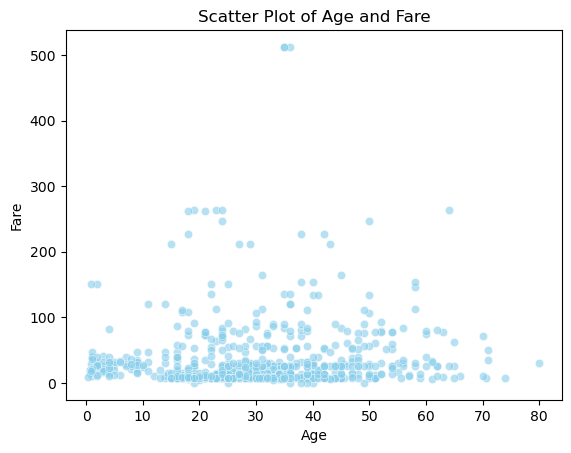

In [14]:






titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])


sns.scatterplot(x='Age', y='Fare', data=titanic_df, alpha=0.6, color='skyblue')


plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age and Fare')


plt.show()



## No Strong Linear Correlation:
-  There doesn't appear to be a strong linear correlation between age and fare. The points are scattered rather than forming a clear trend line. This suggests that age and fare are not strictly dependent on each other in a linear fashion.

## Cluster of Lower Fares for Younger Passengers:
- There is a cluster of points in the lower fare range, particularly for younger passengers. This might be indicative of a pricing structure where younger individuals, potentially children, were charged lower fares.

## Outliers with High Fares
- Some outliers show passengers, across various age groups, who paid notably higher fares. These outliers could represent individuals with special circumstances, perhaps those in premium cabins or with specific ticket types.



## Q5. Group the dataset by 'Embarked' and 'Pclass' and visualize the mean fare for each combination using a bar chart. Comment on the fare differences based on embarkation ports and classes.


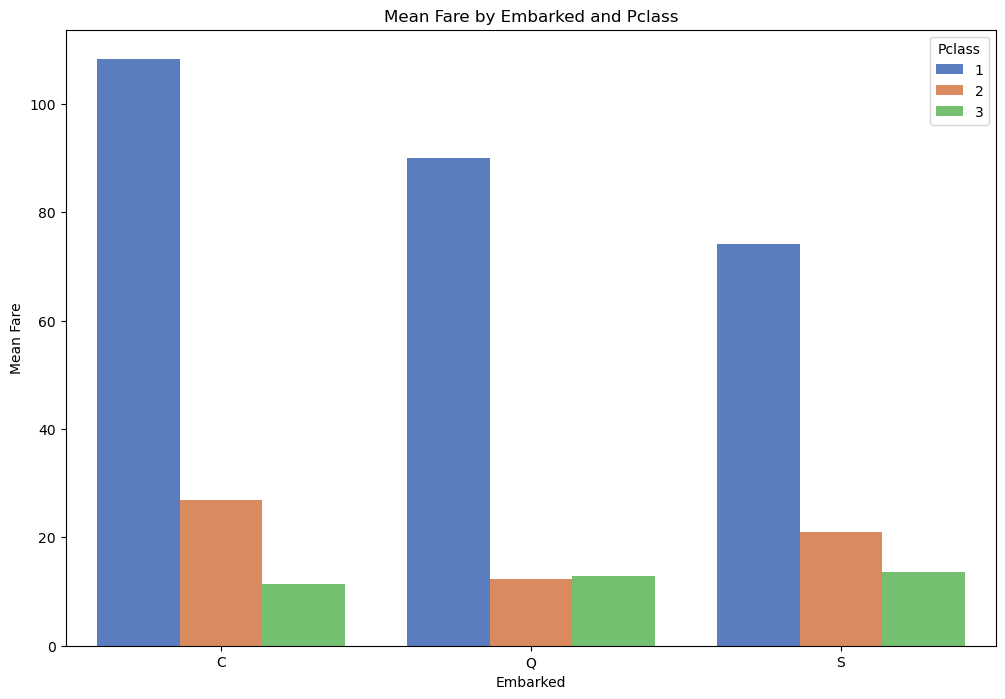

In [15]:
# your code here



fare_by_embarked_pclass = titanic_df.groupby(['Embarked', 'Pclass'])['Fare'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.barplot(x='Embarked', y='Fare', hue='Pclass', data=fare_by_embarked_pclass, palette='muted')


plt.xlabel('Embarked')
plt.ylabel('Mean Fare')
plt.title('Mean Fare by Embarked and Pclass')


plt.show()



## Class Disparities:

- Across all embarkation ports, there is a noticeable hierarchy in mean fares corresponding to passenger classes. Generally, first-class fares are substantially higher than second-class fares, which, in turn, are higher than third-class fares.


## Embarkation Port 'C' (Cherbourg):

- For the first and second classes, passengers who boarded at Cherbourg ('C') tend to have higher mean fares compared to the other ports. This suggests a potential influence of the socio-economic status of passengers embarking from Cherbourg.


## Embarkation Port 'Q' (Queenstown) - Third Class:

- Third-class passengers boarding at Queenstown ('Q') exhibit the lowest mean fares. This aligns with historical information indicating that Queenstown had a higher proportion of third-class passengers, often emigrants seeking economical travel.


## Embarkation Port 'S' (Southampton):

- For both second and third classes, passengers embarking from Southampton ('S') generally have lower mean fares compared to Cherbourg but higher than Queenstown.
 

# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **USE THEM RESPONSIBLY**. For example, you can utilize them to enhance understanding and support your original work, not to replace it. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.


# REFERENCES
[1] Kaggle. (2023). Titanic: Machine Learning from Disaster [Data set]. Kaggle Inc. https://www.kaggle.com/c/titanic/data

# ACKNOWLEDGMENTS

• The design and development of this homework have been assisted by AI tools, with a special mention to ChatGPT for its assistance in conceptualizing the assignment and refining the wording. 
